# Vancovuer Trees Final Report
---
<p style="text-align: right;">Date: May 12, 2025<br>
Author: Nadim Khan</p>

## Introduction

The objective of the project is to analyse the publically available [Vancouver Street Trees dataset](https://opendata.vancouver.ca/explore/dataset/public-trees/information/?disjunctive.neighbourhood_name&disjunctive.on_street&disjunctive.species_name&disjunctive.common_name) (which contains information licensed under the Open Government Licence – Vancouver) as part of the UBC Data Visualition course and address the questions of interest laid out below using an interactive dashboard. 

### Questions of Interest

1. How has the total number of trees planted changed over the years?
    - Plotting the trend of tree plantation over the years will help us understand the city's commitment to urban forestry, ancipate future growth and their ability to meet the goals set by City of Vancouver in their [Greenest Aciton Plan](https://vancouver.ca/green-vancouver/greenest-city-action-plan.aspx).
2. What are most common tree species around Vancouver?
    - Understanding which tree species dominates Vancouver's urban landscape provides insight into the biodiversity of the city's ecosystem, and the species distribution data could also support future planning strategies. 
3. How does the tree diameter vary across different neighbourhoods?
    - The tree diameter is often used as a proxy for age of the trees. This distribution could help inform whether mature trees and recent plantings are distributed evenly across communities.
4. How does the distribution of tree species varies across neighbourhood?
    - Understanding the distribution of species across neighbourhood will allow us to identify under-served communities or over-reliance on particular tree species.

### Data Import

In [1]:
# Imorting the libraries needed for the analysis
import pandas as pd
import altair as alt
alt.renderers.enable("mimetype")

RendererRegistry.enable('mimetype')

In [2]:
# Read in the required dataset

# Dataset URL
trees_url = 'https://raw.githubusercontent.com/UBC-MDS/data_viz_wrangled/main/data/Trees_data_sets/small_unique_vancouver.csv'

# Save as a dataframe and drop the columns required for the analysis as identifieds in Exploratory report
trees_df = pd.read_csv(trees_url, 
                       usecols = ['tree_id', 'species_name', 'common_name', 'neighbourhood_name', 'diameter', 'date_planted', 'latitude', 'longitude'], 
                       parse_dates = ['date_planted'])

trees_df.head(10)

species_name        neighbourhood_name date_planted  diameter  tree_id  \
0    PLATANOIDES                Riley Park   2000-02-23      28.5    21421   
1     CALLERYANA             Arbutus-Ridge   1992-02-04       6.0   129645   
2          NIGRA                    Sunset          NaT      12.0   154675   
3      AMERICANA                 Killarney   1999-11-12      11.0   180803   
4  HIPPOCASTANUM               Shaughnessy          NaT      15.5    74364   
5        PERSICA                  West End   2012-04-05       3.0   233622   
6      CAMPESTRE       Victoria-Fraserview          NaT      12.0   105171   
7    OFFICINALIS  Kensington-Cedar Cottage   2001-04-02       3.0   187792   
8      PALUSTRIS                  Downtown   1999-12-17       8.0   104016   
9           ZUMI       Renfrew-Collingwood   2008-03-13       3.0   102612   

                common_name   latitude   longitude  
0              NORWAY MAPLE  49.252711 -123.106323  
1          CHANTICLEER PEAR  49.256350 -123.158709  
2             AUSTRIAN PINE  49.213486 -123.083254  
3       AUTUMN APPLAUSE ASH  49.220839 -123.036721  
4      COMMON HORSECHESTNUT  49.238514 -123.154958  
5  VANESSA PERSIAN IRONWOOD  49.281906 -123.133076  
6               HEDGE MAPLE  49.217522 -123.071311  
7          CHINESE MAGNOLIA  49.251127 -123.071912  
8                   PIN OAK  49.281303 -123.108253  
9          REDBUD CRABAPPLE  49.257272 -123.030023

### Dataset Description

The dataset used for this analysis is a subset of the Vancouver Street Trees dataset made available on this [link](https://raw.githubusercontent.com/UBC-MDS/data_viz_wrangled/main/data/Trees_data_sets/small_unique_vancouver.csv) by the faculty of UBC. The dataset includes a listing of public trees on boulevards and in parks, in the City of Vancouver and provides data on tree coordinates, species and other related characteristics. Private trees are not included in the inventory. 

**Key Observations & Assumptions**

- As noted in the EDA report, about $50$% of the records are missing from `date_planted` column. Although this limits the reliability, we have retained the column as its essential for the first question and results should be intepreted as indicative, not definite.
- Additionally, the diameter column was learned to be skewed towards right, with a large number of young/small trees and a long tail of older/mature trees. Diameter is assumed to correlated with tree age within same species.
- The subset of the original data from the City of Vancouver website were generated randomly so they may or may not be representative samples of the original data set.
- Similar to the EDA report, for the purpose of our analysis we will use a filtered dataset for just the top 10 most common tree species. 

The table below provides a bried description of the columns and which questions will be answered using them.

In [3]:
# Building the dataset schema 

data = {
    'Column': ['tree_id', 'species_name', 'common_name', 'date_planted', 'diameter()', 'neighbourhood_name', 'latitude', 'longitude'],
    'Descripiton': ['Tree unique ID', 'Name of tree species (Q2, Q4)', 'Common name of the species', 
                    'Date on which the tree is planted (Q1)', 'Diameter of tree at breast height in inches (Q3)', "Neighbourhood where the tree is loacted (Q3, Q4)", 
                    'Geographic coordinates of the tree (Q3, Q4)', 
                    'Geographic coordinates of the tree (Q3, Q4)']
}

pd.DataFrame(data)

Column                                       Descripiton
0             tree_id                                    Tree unique ID
1        species_name                     Name of tree species (Q2, Q4)
2         common_name                        Common name of the species
3        date_planted            Date on which the tree is planted (Q1)
4          diameter()  Diameter of tree at breast height in inches (Q3)
5  neighbourhood_name  Neighbourhood where the tree is loacted (Q3, Q4)
6            latitude       Geographic coordinates of the tree (Q3, Q4)
7           longitude       Geographic coordinates of the tree (Q3, Q4)

In [4]:
# Creating a filtered down version of the dataset

# Saving top 10 species in a list

top_10_species = trees_df['species_name'].value_counts().nlargest(10).index.to_list()

# Filtering the dataset for top 10 species

trees_df = trees_df[trees_df['species_name'].isin(top_10_species)]

# Rename the neighbourhood column for consistency across map json file

trees_df = trees_df.rename(columns = {'neighbourhood_name':'name'})

### Data Summary Table & Methods

In [5]:
# Summary statistics & variables info

trees_df.info()

print('\n')

trees_df.describe(include = 'all')

<class 'pandas.core.frame.DataFrame'>
Index: 2497 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   species_name  2497 non-null   object        
 1   name          2497 non-null   object        
 2   date_planted  1053 non-null   datetime64[ns]
 3   diameter      2497 non-null   float64       
 4   tree_id       2497 non-null   int64         
 5   common_name   2497 non-null   object        
 6   latitude      2497 non-null   float64       
 7   longitude     2497 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 175.6+ KB




species_name                      name                   date_planted  \
count          2497                      2497                           1053   
unique           10                        22                            NaN   
top       SERRULATA  Kensington-Cedar Cottage                            NaN   
freq            463                       197                            NaN   
mean            NaN                       NaN  2003-09-15 17:35:43.589743616   
min             NaN                       NaN            1989-11-06 00:00:00   
25%             NaN                       NaN            1997-04-30 00:00:00   
50%             NaN                       NaN            2003-02-24 00:00:00   
75%             NaN                       NaN            2009-12-18 00:00:00   
max             NaN                       NaN            2019-03-29 00:00:00   
std             NaN                       NaN                            NaN   

           diameter        tree_id               common_name     latitude  \
count   2497.000000    2497.000000                      2497  2497.000000   
unique          NaN            NaN                        75          NaN   
top             NaN            NaN  KWANZAN FLOWERING CHERRY          NaN   
freq            NaN            NaN                       383          NaN   
mean      13.133556  120584.413296                       NaN    49.246715   
min        0.000000      36.000000                       NaN    49.202986   
25%        5.500000   55212.000000                       NaN    49.230067   
50%       12.000000  115127.000000                       NaN    49.247247   
75%       18.500000  182944.000000                       NaN    49.262530   
max       56.000000  270590.000000                       NaN    49.293930   
std        8.760604   74377.582360                       NaN     0.021235   

          longitude  
count   2497.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean    -123.106956  
min     -123.217820  
25%     -123.142180  
50%     -123.105327  
75%     -123.067720  
max     -123.023611  
std        0.046942

### How has the total number of trees planted changed over the years?

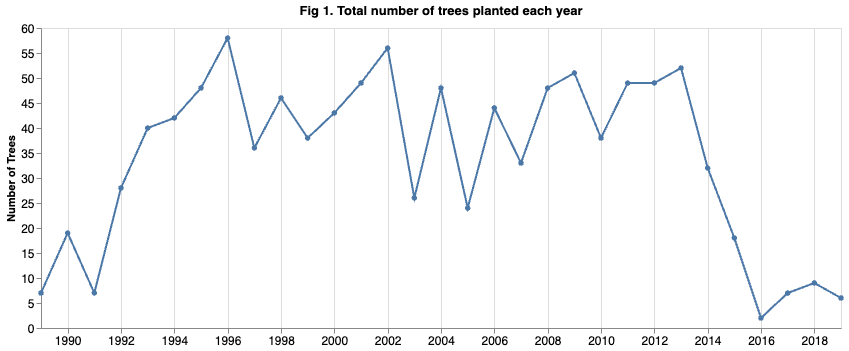

In [6]:
trees_per_year_line = alt.Chart(trees_df).mark_line().encode(
    alt.X('year(date_planted)', title = None, 
          axis = alt.Axis(labelFontSize = 12)),
    alt.Y('count()', title = 'Number of Trees', 
          scale = alt.Scale(domain = [0, 60]), 
          axis = alt.Axis(grid = False, tickCount = 10, labelFontSize = 12)),
    tooltip = [alt.Tooltip('count()', title = "Number of Trees")],
)

trees_per_year = trees_per_year_line + trees_per_year_line.mark_circle()

trees_per_year.properties(title = 'Fig 1. Total number of trees planted each year', width = 800)

The time series chart indicates three disctinct phases of tree plantation activity in the Figure 1: a growth period between 1990-1996, a volatile mid-period (1997-2014) with high plantation activity, and a steep decline post 2014. The shifts raise further questions on what types of trees were being planted during these cycles and do certain species dominate due to the past planting activities? Furhter we will look at the distribution of tree species to help us understand how species selection may have influnced the current biodiversity of the city's ecosystem and whether having a diverse species of trees was a proirity.

### What are most common tree species around Vancouver?

In [7]:
species_max_count = trees_df.groupby('species_name').size().max()

/var/folders/9v/68m5q1k140v1210s62chp_zr0000gn/T/ipykernel_21748/1201962476.py:1: AltairDeprecationWarning: 
Deprecated since `altair=5.0.0`. Use selection_point instead.
  species_click = alt.selection_multi(fields = ['species_name'])
/var/folders/9v/68m5q1k140v1210s62chp_zr0000gn/T/ipykernel_21748/1201962476.py:9: AltairDeprecationWarning: 
Deprecated since `altair=5.0.0`. Use add_params instead.
  ).transform_filter(species_click).add_selection(year_brush)
/var/folders/9v/68m5q1k140v1210s62chp_zr0000gn/T/ipykernel_21748/1201962476.py:16: AltairDeprecationWarning: 
Deprecated since `altair=5.0.0`. Use add_params instead.
  ).transform_filter(year_brush).add_selection(species_click)


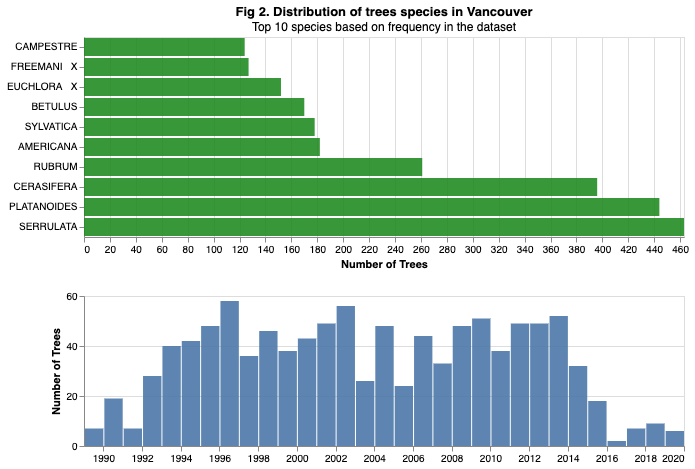

In [8]:
species_click = alt.selection_multi(fields = ['species_name'])

year_brush = alt.selection_interval()

bar_slider = alt.Chart(trees_df).mark_bar().encode(
    alt.X('year(date_planted)', title = None, axis = alt.Axis(grid = False)), 
    alt.Y('count()', title = 'Number of Trees', scale = alt.Scale(domain = [0, 60])),
    opacity = alt.condition(year_brush, alt.value(0.9), alt.value(0.05))
).transform_filter(species_click).add_selection(year_brush)

top_species = alt.Chart(trees_df).mark_bar(color = 'forestgreen').encode(
    alt.X('count()', title = 'Number of Trees', scale = alt.Scale(domain=[0, species_max_count])), 
    alt.Y('species_name', sort = 'x', title = None),
    opacity = alt.condition(species_click, alt.value(0.9), alt.value(0.05)),
    tooltip = [alt.Tooltip('count()', title = "Number of Trees")]
).transform_filter(year_brush).add_selection(species_click)

top_species.properties(title = alt.TitleParams('Fig 2. Distribution of trees species in Vancouver', 
                       subtitle = 'Top 10 species based on frequency in the dataset'), width = 600) & bar_slider.properties(width = 600, height = 150)

As evident in Figure 2, the most dominant tree species in the city overall are Serrulata, Platanoides, and Cerasifera, respectively. However, when examining tree planting activity across the three periods using the chart's interactive selection feature, a clear shift toward intentional diversification emerges. In the **early growth phase** (1990–1996), there was an over-reliance on a single species, with Platanoides dominating plantings. This trend continued through the **mid high-plantation period** (1997–2014), although we begin to see signs of diversification with species like Rubrum and Sylvatica being planted alongside Platanoides. Finally, in the **post-2014 period**, the data shows a move toward greater species diversity and a decline in the use of overrepresented species.

Although Serrulata is the most prevalent species overall, it only appears among the top three species planted in the post-2014 period. This may be due to missing values in the `date_planted` column or because these trees were planted before the 1990s, suggesting older growth. To explore this further and drive the next question let's examine the diameter of tree across species and neighbourhood, which can serve as a proxy for tree age.

### How does the tree diameter vary across different neighbourhood?

/var/folders/9v/68m5q1k140v1210s62chp_zr0000gn/T/ipykernel_21748/3804293910.py:13: AltairDeprecationWarning: 
Deprecated since `altair=5.0.0`. Use add_params instead.
  ).add_selection(species_click)


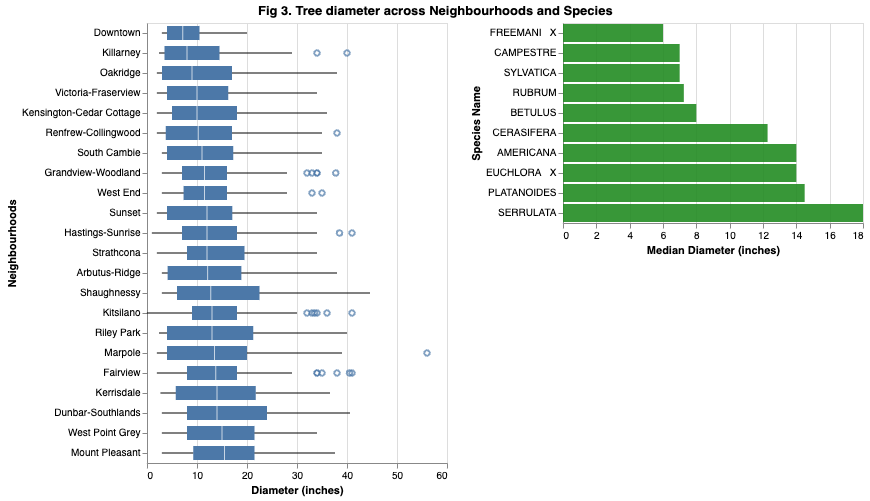

In [9]:
diameter_order = trees_df.groupby('name')['diameter'].median().sort_values().index.to_list()


median_diameter = alt.Chart(trees_df).mark_boxplot().encode(
    alt.X('diameter', title = 'Diameter (inches)'), 
    alt.Y('name', title = 'Neighbourhoods', sort = diameter_order)
).transform_filter(species_click)

species_diameter = alt.Chart(trees_df).mark_bar(color = 'forestgreen').encode(
    alt.X('median(diameter)', title = 'Median Diameter (inches)'), 
    alt.Y('species_name', title = 'Species Name', sort = 'x'),
    opacity=alt.condition(species_click, alt.value(0.9), alt.value(0.05))
).add_selection(species_click)


(median_diameter | species_diameter).properties(title = alt.TitleParams('Fig 3. Tree diameter across Neighbourhoods and Species', anchor = 'middle'))

**Figure 3** shows that Serrulata has the largest median diameter among the top 10 tree species. At the neighbourhood level, Mount Pleasant, West Point Grey, and Dunbar-Southlands have the highest median tree diameters, while Downtown, Killarney, and Oakridge rank at the bottom.

When we isolate the top three most dominant species—Serrulata, Platanoides, and Cerasifera—the median diameter across most neighbourhoods consistently falls between 10 and 20 inches. However, Downtown and Oakridge fall below this range, suggesting either a prevalence of younger plantings or replacement strategies that differ from other neighbourhoods. Since the diameter varies significantly within species, this alone doesn't provide strong enough evidence to determine whether mature trees and recent plantings are distributed equitably across communities. The next question will help shed some more light on that!

### How does the distribution of tree species varies across neighbourhood?

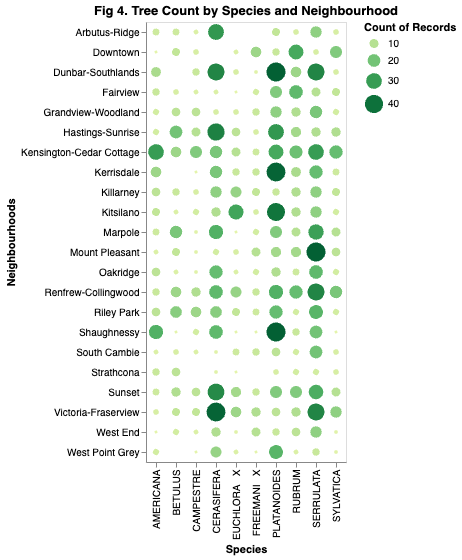

In [10]:
species_dist = alt.Chart(trees_df).mark_circle().encode(
    alt.X('species_name', title = 'Species'), 
    alt.Y('name', title = 'Neighbourhoods'),
    alt.Color ('count()', scale = alt.Scale(scheme = 'yellowgreen')),
    size = 'count()', 
    tooltip = [alt.Tooltip('name', title = "Neighbourhood Name"), 
               alt.Tooltip('species_name', title = "Species Name"), 
               alt.Tooltip('median(diameter)', title = "Median diameter")]
)

species_dist.properties(title = 'Fig 4. Tree Count by Species and Neighbourhood')

In Figure 4, Kensington-Cedar Cottage, Killarney, and Renfrew-Collingwood show a more balanced distribution of tree species, suggesting a more deliberate approach to diversity in tree plantation. On the other hand, Downtown is heavily dominated by the Rubrum species, while Oakridge shows a concentration of Serrulata and Cerasifera trees. To asses whether this suggests either a prevalence of younger plantings or replacement strategies, we would need to more data on the date planted column to make accurate interpretation which could be a great next project.

## Discussion

Tree planting in Vancouver shows three distinct phases: growth (1990–1996), peak activity (1997–2014), and a sharp decline post-2014. These shifts prompt questions about how species priorities evolved over time. Serrulata, Platanoides, and Cerasifera are the most common species overall. However, the diversity has improved in the recent years, with early periods dominated by Platanoides and later years showing broader variety. Neighbourhoods like Mount Pleasant and West Point Grey have larger median diameters indication of older trees, while Downtown and Oakridge trend smaller. This could suggest more recent plantings or different replacement strategies, though missing planting dates limit conclusions. Kensington-Cedar Cottage and Killarney shows balanced species distributions, while Downtown and Oakridge rely heavily on a few species.

The city appears to be moving towards a greater diversity in tree planting, especially after 2014. However, gaps in the date_planted column limit conclusions about tree age and replacement strategies. Further work should include, filling temporal gaps and exploring socio-demographic correlation.

## Interactive Dashboard

- Combine the visualizations that you made in your report into an interactive panel and add some interactive components (choose all 4 or just 2 plots)
- Have at least 2 widgets (Example: drop-down menu, slider, check box, clickable legend) and one plot that acts as a selection tool (Example: clicking on one plot will change the data displayed in another plot). (this requirement is the same for 4 or 2 plots)
- For 4 Plots: have one plot that changes based on a selection in the other plot.
- For 2: have one plot that changes based on a selection in the other plot, and both plots interactive with a selection widget)
- All plots should have clear titles/labels/selection tools. 

/var/folders/9v/68m5q1k140v1210s62chp_zr0000gn/T/ipykernel_21748/3534124853.py:5: AltairDeprecationWarning: 
Deprecated since `altair=5.0.0`. Use selection_point instead.
  select_species = alt.selection_single(fields = ['species_name'], bind = species_dropdown)
/var/folders/9v/68m5q1k140v1210s62chp_zr0000gn/T/ipykernel_21748/3534124853.py:7: AltairDeprecationWarning: 
Deprecated since `altair=5.0.0`. Use add_params instead.
  dashboard = top_species & bar_slider.properties(height = 175) | median_diameter.properties(width = 300) | species_dist.add_selection(select_species).transform_filter(select_species)


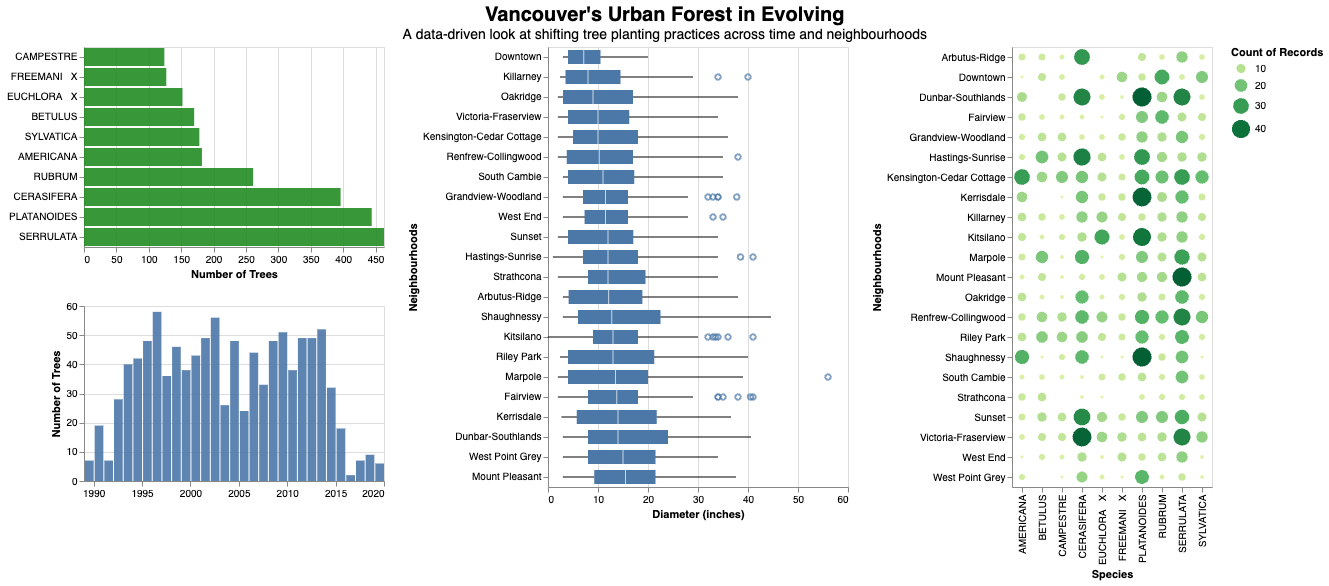

In [11]:
species = sorted(trees_df['species_name'].unique())

species_dropdown = alt.binding_select(name = 'Species ', options = species)

select_species = alt.selection_single(fields = ['species_name'], bind = species_dropdown)

dashboard = top_species & bar_slider.properties(height = 175) | median_diameter.properties(width = 300) | species_dist.add_selection(select_species).transform_filter(select_species)

dashboard.properties(title = alt.TitleParams("Vancouver's Urban Forest in Evolving", 
                                             anchor = 'middle', 
                                             subtitle = 'A data-driven look at shifting tree planting practices across time and neighbourhoods',
                                             fontSize = 20, subtitleFontSize= 14
                                            ))

## References

- [Data Source](https://raw.githubusercontent.com/UBC-MDS/data_viz_wrangled/main/data/Trees_data_sets/small_unique_vancouver.csv)
- Data Visualization Sample Project for inspiration
- [Fundamentals of Data Visualization](https://clauswilke.com/dataviz/) book to determine the right graph for visualization
- [Greenest City Action Plan](https://vancouver.ca/green-vancouver/greenest-city-action-plan.aspx) for narrative inspiration
